### Naive Bayes를 적용한 분류 예측.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
%matplotlib inline

#### 1. 데이터를 읽어오고 탐색한다.

In [2]:
# 내장 데이터 읽어오기.
data = load_iris()

In [3]:
# 데이터에 대한 설명 보기.
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# 설명 변수.
X = data['data']
columns = list(data['feature_names'])
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Response variable.
Y = data['target']
labels = list(data['target_names'])
print(labels)

['setosa', 'versicolor', 'virginica']


C:\Users\PC\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


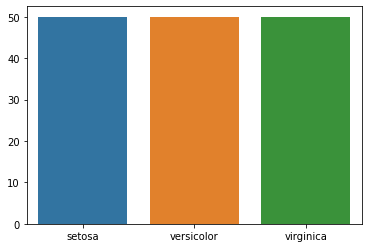

In [6]:
# 반응 변수.
ser = pd.Series(Y)
table = ser.value_counts()
table = table.sort_index()                                         # Has to be sorted for correct labeling.
sns.barplot(labels,table.values)
plt.show()

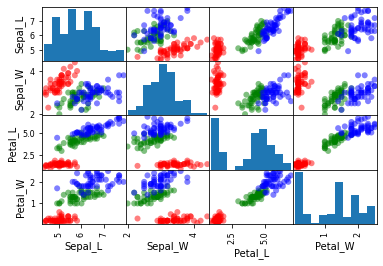

In [7]:
# 산점도 행렬.
X_df = pd.DataFrame(X,columns=['Sepal_L','Sepal_W','Petal_L','Petal_W'])
my_cols_dict = {0:'red', 1:'green', 2:'blue'}
my_cols = pd.Series(Y).apply(lambda x: my_cols_dict[x])
pd.plotting.scatter_matrix(X_df, c=my_cols, marker='o', alpha=0.5)
plt.show()

#### 2. Naive Bayes Train과 Test.

In [8]:
# 데이터를 Training과 Testing 용으로 쪼갠다.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [10]:
# Train과 예측.
GNB = GaussianNB()
GNB.fit(X_train,Y_train)
Y_pred_test = GNB.predict(X_test)        

In [11]:
# 혼동 행렬.
conf_mat = metrics.confusion_matrix(Y_test, Y_pred_test)
print(conf_mat)

[[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]


In [12]:
# 정확도.
accuracy = metrics.accuracy_score(Y_test, Y_pred_test)
print('Accuracy    = ' + str(np.round(accuracy,3)))

Accuracy    = 0.956


#### 3. 사후확률의 시각화.

In [13]:
centers = GNB.theta_
variances = GNB.sigma_

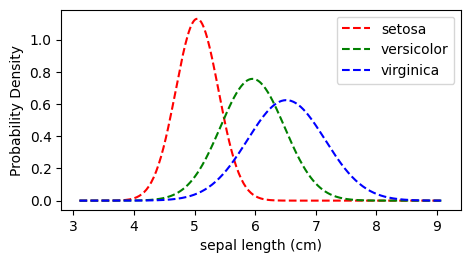

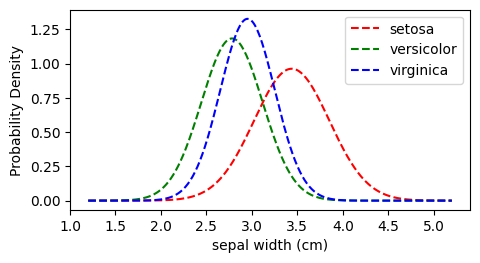

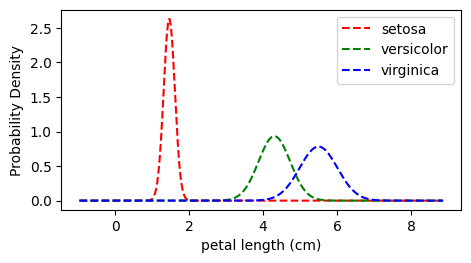

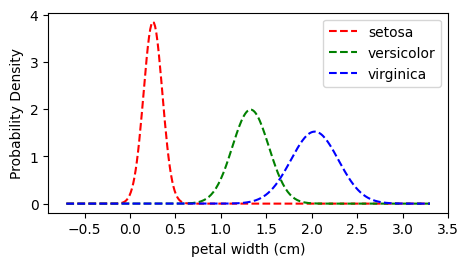

In [14]:
for i in range(4):
    x_min = X[:,i].min()
    x_max = X[:,i].max()
    x_range = x_max-x_min
    x_grid = np.linspace(x_min-x_range/3,x_max+x_range/3,300)
    fig=plt.figure(figsize=(4,2), dpi=100)      # Width, height and DPI setting.
    ax = fig.add_axes([0,0,1,1])                # Left, bottom, width, height.
    ax.set_xlabel(columns[i])
    ax.set_ylabel('Probability Density')
    for j in range(3):
        center = centers[j,i]
        sigma = np.sqrt(variances[j,i])
        ax.plot(x_grid, st.norm.pdf(x_grid,loc=center,scale=sigma),color=my_cols_dict[j],linestyle="--",label=labels[j])
    ax.legend(loc=0)
    plt.show()    